In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import optuna 
import math
import seaborn as sns
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb

In [2]:
adidas_final_df = pd.read_csv('adidas_final_df.csv')

price_256_df = pd.read_csv('price_256_df.csv')

text_df_256 = pd.read_csv('text_df_256.csv')

img_xception_256_df = pd.read_csv('img_xception_256_df.csv')

In [3]:
price_256_df = price_256_df.iloc[:, 1:]
price_256_df.columns = list('price' + str(i) for i in range(len(price_256_df.columns)))

text_df_256 = text_df_256.iloc[:, 1:]
text_df_256.columns = list('text' + str(i) for i in range(len(text_df_256.columns)))

img_xception_256_df = img_xception_256_df.iloc[:, 1:]
img_xception_256_df.columns = list('img' + str(i) for i in range(len(img_xception_256_df.columns)))

In [4]:
df = pd.concat([adidas_final_df[['avg_sale_price_12_month']], price_256_df, img_xception_256_df, text_df_256], axis=1)

[10:57:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:20485.9	eval-rmse:16114.5
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:17086.7	eval-rmse:13884.9
[2]	train-rmse:14564.2	eval-rmse:12644.1
[3]	train-rmse:12741.8	eval-rmse:12029.9
[4]	train-rmse:11287.1	eval-rmse:11760.1
[5]	train-rmse:10232.3	eval-rmse:11348.1
[6]	train-rmse:9554.29	eval-rmse:11322.5
[7]	train-rmse:8801.46	eval-rmse:11325.8
[8]	train-rmse:8315.5	eval-rmse:11410.9
[9]	train-rmse:7915.04	eval-rmse:11450.1
[10]	train-rmse:7683.76	eval-rmse:11462.9
[11]	train-rmse:7342.48	eval-rmse:11491.6
[12]	train-rmse:7177.79	eval-rmse:11501.2
[13]	train-rmse:7012.8	eval-rmse:11518.8
[14]	train-rmse:6794.5	eval-rmse:11584.5
[15]	train-rmse:6548.94	eval-rmse:11600.4
[16]	train-rmse:6201.56	eval-rmse:11593.8
Stopping. Best iteration:
[6]	train-rmse

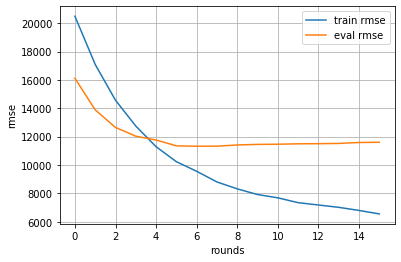

In [5]:
X = df.drop('avg_sale_price_12_month', axis=1)
y = df['avg_sale_price_12_month']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_val, label=y_val)

xgb_params = {
    # 回帰問題 reg:squarederror
    'objective': 'reg:linear',
    # 学習用の指標 (RMSE)
    'eval_metric': 'rmse',
}
evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}
bst = xgb.train(xgb_params,
                dtrain,
                num_boost_round=1000,
                early_stopping_rounds=10,
                evals=evals,
                evals_result=evals_result,
                )

y_pred = bst.predict(dtest)
mse = mean_squared_error(y_val, y_pred)
print('RMSE:', math.sqrt(mse))

train_metric = evals_result['train']['rmse']
plt.plot(train_metric, label='train rmse')
eval_metric = evals_result['eval']['rmse']
plt.plot(eval_metric, label='eval rmse')
plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('rmse')
plt.show()

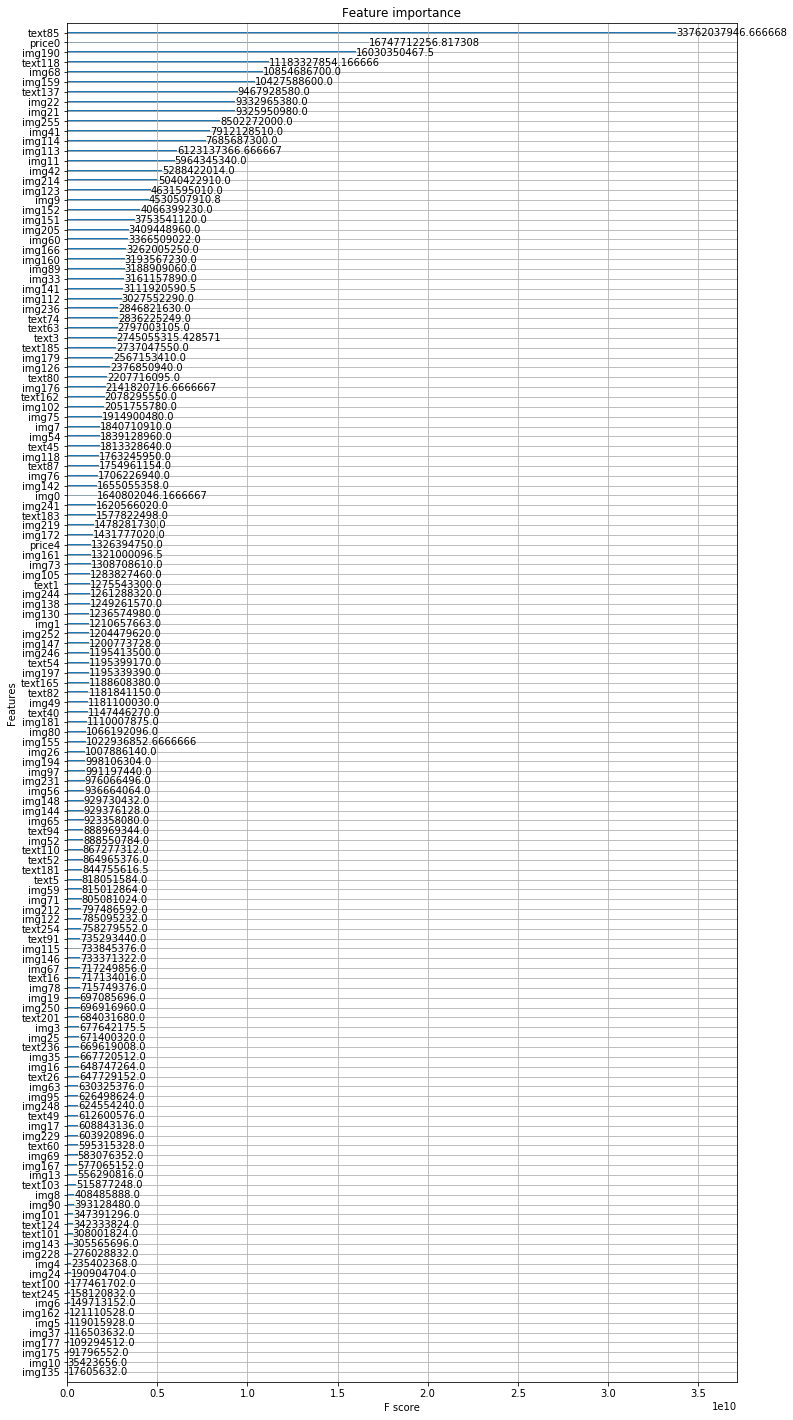

In [6]:
_, ax = plt.subplots(figsize=(12, 25))
xgb.plot_importance(bst, ax=ax, importance_type='gain')

In [7]:
dtest = xgb.DMatrix(X_test, label=y_test)

y_pred = bst.predict(dtest)
mse = mean_squared_error(y_test, y_pred)
print('RMSE:', math.sqrt(mse))

RMSE: 12487.940700971167


(5000, 125000)

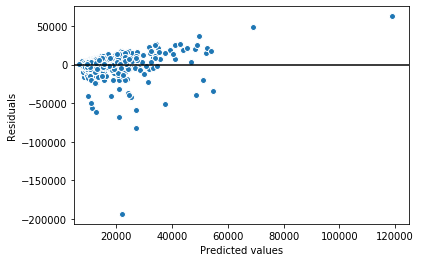

In [8]:
plt.scatter(y_pred, y_pred - y_test, edgecolor='white')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=5000, xmax=125000)
plt.xlim([5000, 125000])

In [9]:
adidas_final_df = pd.read_csv('adidas_final_df.csv')
price_128_df = pd.read_csv('price_128_df.csv')
text_df_128 = pd.read_csv('text_df_128.csv')
img_xception_128_df = pd.read_csv('img_xception_128_df.csv')


price_128_df = price_128_df.iloc[:, 1:]
price_128_df.columns = list('price' + str(i) for i in range(len(price_128_df.columns)))

text_df_128 = text_df_128.iloc[:, 1:]
text_df_128.columns = list('text' + str(i) for i in range(len(text_df_128.columns)))

img_xception_128_df = img_xception_128_df.iloc[:, 1:]
img_xception_128_df.columns = list('img' + str(i) for i in range(len(img_xception_128_df.columns)))


df = pd.concat([adidas_final_df[['avg_sale_price_12_month']], price_128_df, img_xception_128_df, text_df_128], axis=1)

[10:59:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:20495.3	eval-rmse:16319.9
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:17128.4	eval-rmse:14106.5
[2]	train-rmse:14663.5	eval-rmse:12926.7
[3]	train-rmse:12806.2	eval-rmse:12347.4
[4]	train-rmse:11371.8	eval-rmse:12047.9
[5]	train-rmse:10231.2	eval-rmse:11976.2
[6]	train-rmse:9327.1	eval-rmse:11837.4
[7]	train-rmse:8585.36	eval-rmse:11992.8
[8]	train-rmse:7939.24	eval-rmse:11970.4
[9]	train-rmse:7493.69	eval-rmse:11993.1
[10]	train-rmse:7128.51	eval-rmse:11810.2
[11]	train-rmse:6858.26	eval-rmse:11836.1
[12]	train-rmse:6545.07	eval-rmse:11851.7
[13]	train-rmse:6344.47	eval-rmse:11902
[14]	train-rmse:6142.33	eval-rmse:11939.6
[15]	train-rmse:6039.14	eval-rmse:11947.7
[16]	train-rmse:5875.41	eval-rmse:11960.5
[17]	train-rmse:5706.16	eval-rmse:12000.

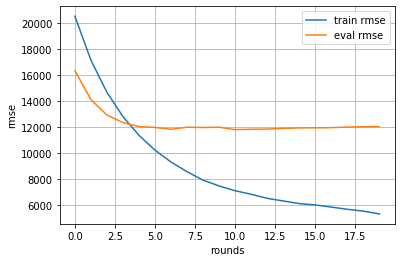

In [10]:
X = df.drop('avg_sale_price_12_month', axis=1)
y = df['avg_sale_price_12_month']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_val, label=y_val)

xgb_params = {
    # 回帰問題 reg:squarederror
    'objective': 'reg:linear',
    # 学習用の指標 (RMSE)
    'eval_metric': 'rmse',
}
evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}
bst = xgb.train(xgb_params,
                dtrain,
                num_boost_round=1000,
                early_stopping_rounds=10,
                evals=evals,
                evals_result=evals_result,
                )

y_pred = bst.predict(dtest)
mse = mean_squared_error(y_val, y_pred)
print('RMSE:', math.sqrt(mse))

train_metric = evals_result['train']['rmse']
plt.plot(train_metric, label='train rmse')
eval_metric = evals_result['eval']['rmse']
plt.plot(eval_metric, label='eval rmse')
plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('rmse')
plt.show()

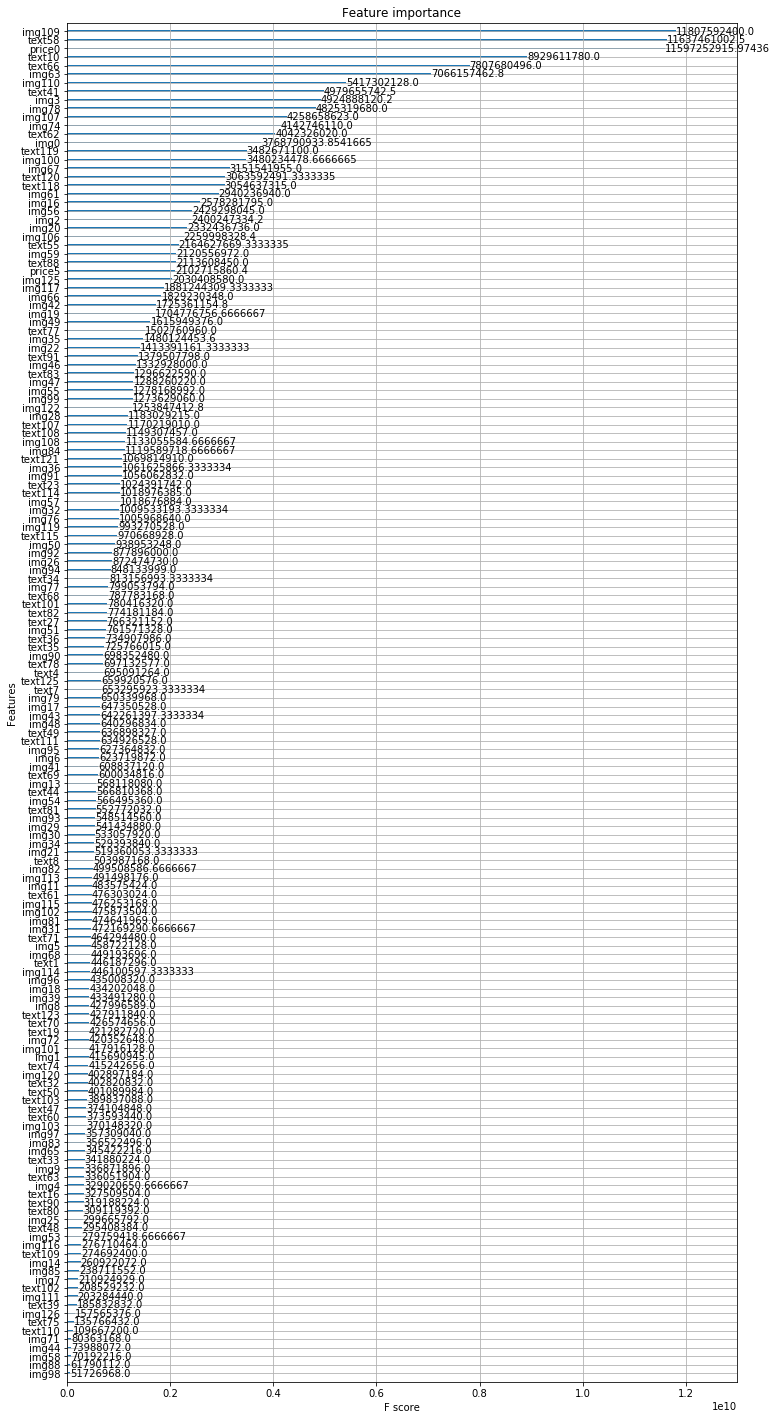

In [11]:
_, ax = plt.subplots(figsize=(12, 25))
xgb.plot_importance(bst, ax=ax, importance_type='gain')

In [12]:
dtest = xgb.DMatrix(X_test, label=y_test)

y_pred = bst.predict(dtest)
mse = mean_squared_error(y_test, y_pred)
print('RMSE:', math.sqrt(mse))

RMSE: 13007.656587580173


(5000, 125000)

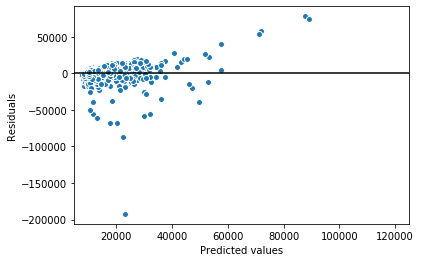

In [13]:
plt.scatter(y_pred, y_pred - y_test, edgecolor='white')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=5000, xmax=125000)
plt.xlim([5000, 125000])

In [14]:
adidas_final_df = pd.read_csv('adidas_final_df.csv')
price_64_df = pd.read_csv('price_64_df.csv')
text_df_64 = pd.read_csv('text_df_64.csv')
img_xception_64_df = pd.read_csv('img_xception_64_df.csv')


price_64_df = price_64_df.iloc[:, 1:]
price_64_df.columns = list('price' + str(i) for i in range(len(price_64_df.columns)))

text_df_64 = text_df_64.iloc[:, 1:]
text_df_64.columns = list('text' + str(i) for i in range(len(text_df_64.columns)))

img_xception_64_df = img_xception_64_df.iloc[:, 1:]
img_xception_64_df.columns = list('img' + str(i) for i in range(len(img_xception_64_df.columns)))


df = pd.concat([adidas_final_df[['avg_sale_price_12_month']], price_64_df, img_xception_64_df, text_df_64], axis=1)

[11:00:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:20598	eval-rmse:15933
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:17020.4	eval-rmse:13643.4
[2]	train-rmse:14553.7	eval-rmse:12402.1
[3]	train-rmse:12885.8	eval-rmse:11758.1
[4]	train-rmse:11554	eval-rmse:11957.9
[5]	train-rmse:10444.8	eval-rmse:12335.4
[6]	train-rmse:9630.05	eval-rmse:12686.3
[7]	train-rmse:8981.17	eval-rmse:13166.7
[8]	train-rmse:8531.42	eval-rmse:13531.7
[9]	train-rmse:8150.53	eval-rmse:13902.9
[10]	train-rmse:7822.87	eval-rmse:14227.6
[11]	train-rmse:7552.49	eval-rmse:14493.2
[12]	train-rmse:7359.04	eval-rmse:14514.1
[13]	train-rmse:7227.33	eval-rmse:14515.9
Stopping. Best iteration:
[3]	train-rmse:12885.8	eval-rmse:11758.1

RMSE: 14515.918424773621


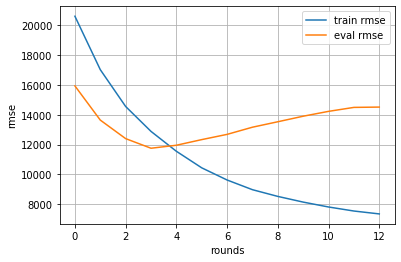

In [15]:
X = df.drop('avg_sale_price_12_month', axis=1)
y = df['avg_sale_price_12_month']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_val, label=y_val)

xgb_params = {
    # 回帰問題 reg:squarederror
    'objective': 'reg:linear',
    # 学習用の指標 (RMSE)
    'eval_metric': 'rmse',
}
evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}
bst = xgb.train(xgb_params,
                dtrain,
                num_boost_round=1000,
                early_stopping_rounds=10,
                evals=evals,
                evals_result=evals_result,
                )

y_pred = bst.predict(dtest)
mse = mean_squared_error(y_val, y_pred)
print('RMSE:', math.sqrt(mse))

train_metric = evals_result['train']['rmse']
plt.plot(train_metric, label='train rmse')
eval_metric = evals_result['eval']['rmse']
plt.plot(eval_metric, label='eval rmse')
plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('rmse')
plt.show()

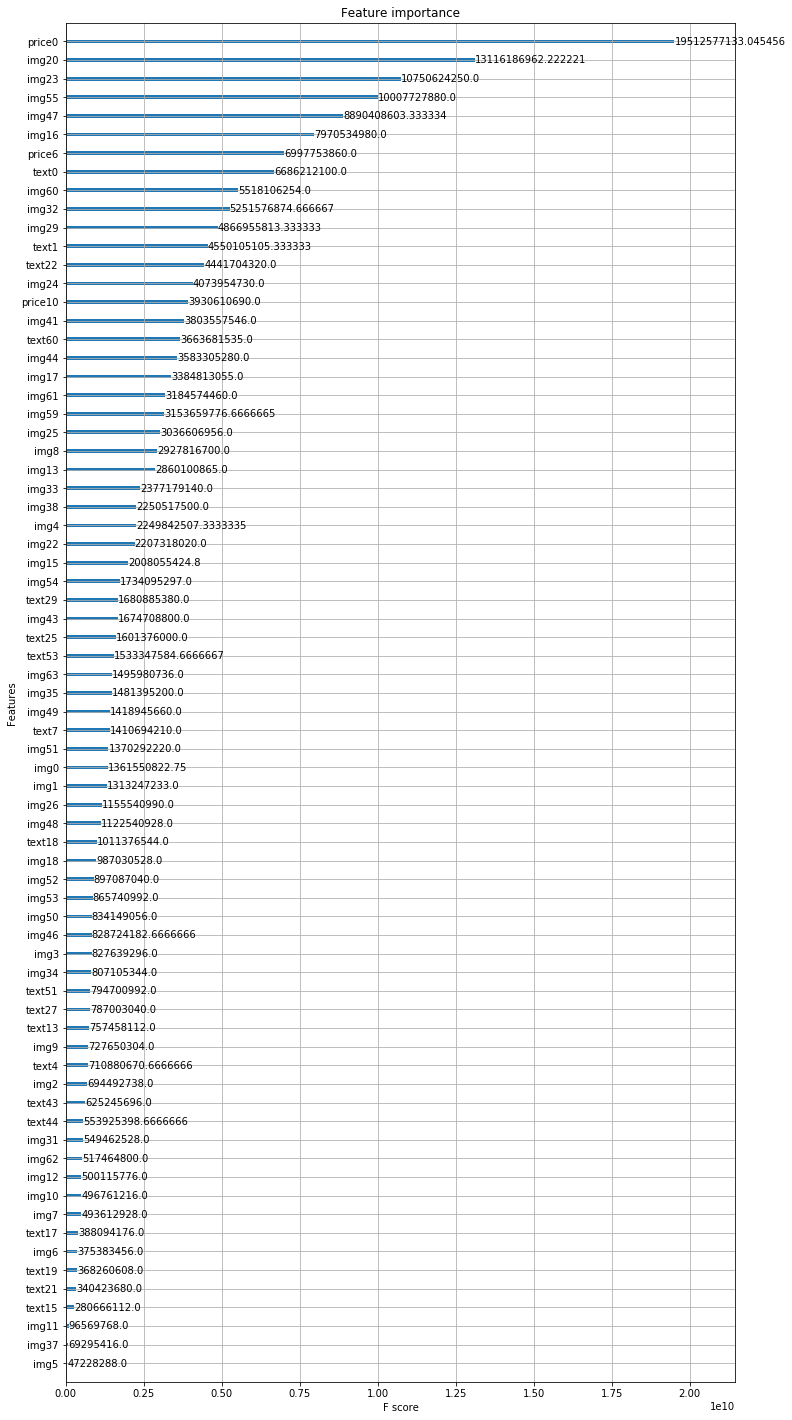

In [16]:
_, ax = plt.subplots(figsize=(12, 25))
xgb.plot_importance(bst, ax=ax, importance_type='gain')

In [17]:
dtest = xgb.DMatrix(X_test, label=y_test)

y_pred = bst.predict(dtest)
mse = mean_squared_error(y_test, y_pred)
print('RMSE:', math.sqrt(mse))

RMSE: 16872.243431778526


(5000, 125000)

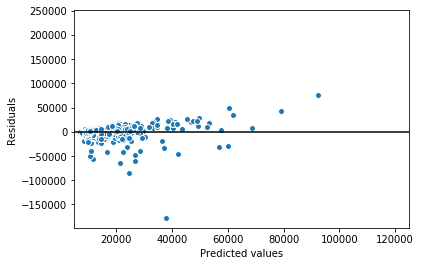

In [18]:
plt.scatter(y_pred, y_pred - y_test, edgecolor='white')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=5000, xmax=125000)
plt.xlim([5000, 125000])